In [23]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import scipy.stats as stats

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

Figura de espacio de decisiones a espacio de objetivos

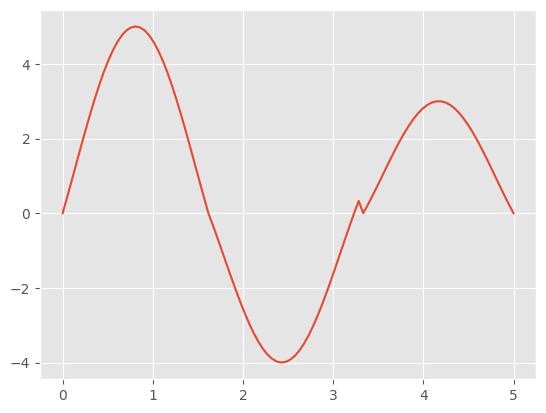

In [29]:
x=np.linspace(0,5,100)

def parabola_max_enmedio(x,crest):
    x_enm=x[len(x)//2]
    return -(x-x_enm)**2+crest 


def seno_osc(x,osc=2):
    return np.sin(x/(x[-1]-x[0])*np.pi*osc)

def max_loc(x,tam_izq=1/3,tam_enmedio=1/3):
    tam_der=1-tam_izq-tam_enmedio
    # Función con máximo global del lado izq
    lim_izq,lim_enm=int(len(x)*tam_izq), int(len(x)*(tam_izq+tam_enmedio))
    x_izq,x_enm,x_der=x[:lim_izq],x[lim_izq:lim_enm],x[lim_enm:]
    
    f_izq=seno_osc(x_izq,1)*parabola_max_enmedio(x_izq,5)
    f_enm=seno_osc(x_enm,1)*parabola_max_enmedio(x_enm,4)
    f_der=seno_osc(x_der,1)*parabola_max_enmedio(x_der,3)
   
    return np.r_[f_izq,f_enm,f_der]

plt.plot(x,max_loc(x))

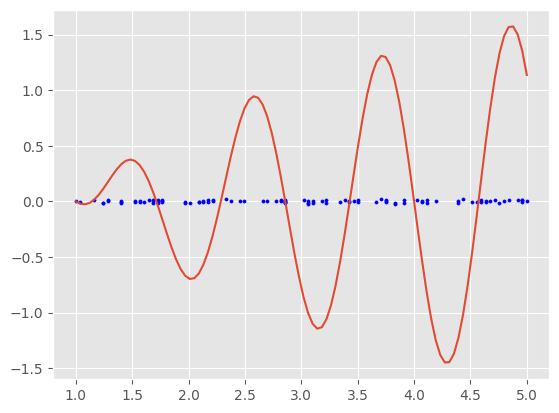

In [57]:
x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/(x[-1]-x[0]))*np.log(x)

plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=100)
plt.scatter(x_random,np.random.normal(0,0.01,size=len(x_random)),label='puntos generados',s=5,c='blue')


La función está dada por

$$ f(x)=\sin\left(n_{osc}*{2\pi}\frac{x}{L}\right) \log(x) $$

su derivada está dada por 
$$ f'(x)=-n_{osc}{2\pi}\frac{1}{L}\cos\left(n_{osc}{2\pi}\frac{x}{L}\right)\log(x)+\sin\left(n_{osc}{2\pi}\frac{x}{L}\right)\frac{1}{x} $$

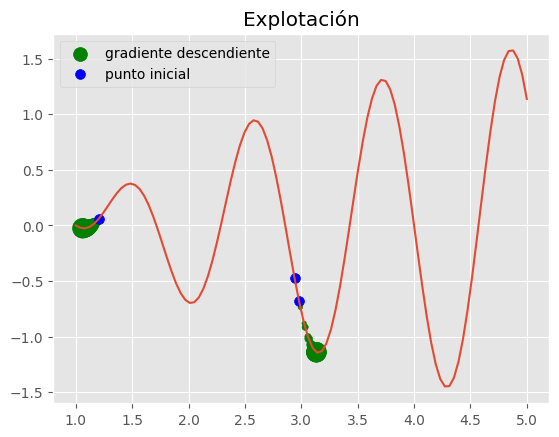

In [144]:
L=x[-1]-x[0]

def grad(x,L=L,n_osc=n_osc):
    return -n_osc*2*np.pi/L*np.cos(n_osc*2*np.pi*x/L)*np.log(x)+np.sin(n_osc*2*np.pi*x/L)/x

grad(x[0],L,n_osc=3.5)

def loop_gradiente_desc(x,grad,α=0.01,N_iter=20):
    tray_x=[x]
    for i in range(N_iter):
        x+=α*grad(x)
        tray_x.append(x)
    
    return np.array(tray_x)

x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/L)*np.log(x)
plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=3)

for i,xir in enumerate(x_random):

    path_gd=loop_gradiente_desc(xir,grad=grad)
    if i==0:
        plt.scatter(path_gd,func_osc(path_gd),color='g',label='gradiente descendiente',s=np.arange(len(path_gd))*10)
        
    else:
        plt.scatter(path_gd,func_osc(path_gd),color='g',s=np.arange(len(path_gd))*10)

plt.title('Explotación')
plt.scatter(x_random,func_osc(x_random),label='punto inicial',s=50,c='blue')
plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/explotacion.pdf')
plt.legend()
plt.show()

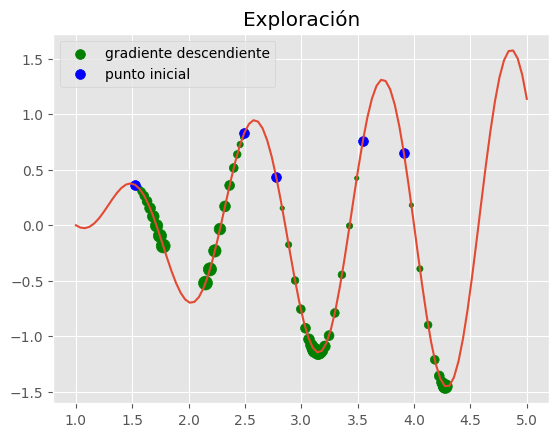

In [143]:
L=x[-1]-x[0]

def grad(x,L=L,n_osc=n_osc):
    return -n_osc*2*np.pi/L*np.cos(n_osc*2*np.pi*x/L)*np.log(x)+np.sin(n_osc*2*np.pi*x/L)/x

grad(x[0],L,n_osc=3.5)

def loop_gradiente_desc(x,grad,α=0.01,N_iter=10):
    tray_x=[x]
    for i in range(N_iter):
        x+=α*grad(x)
        tray_x.append(x)
    
    return np.array(tray_x)

x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/L)*np.log(x)
plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=5)

for i,xir in enumerate(x_random):

    path_gd=loop_gradiente_desc(xir,grad=grad)
    if i==0:
        plt.scatter(path_gd,func_osc(path_gd),color='g',label='gradiente descendiente',s=np.arange(len(path_gd))*10)
        
    else:
        plt.scatter(path_gd,func_osc(path_gd),color='g',s=np.arange(len(path_gd))*10)

plt.title('Exploración')
plt.scatter(x_random,func_osc(x_random),label='punto inicial',s=50,c='blue')
plt.legend()
plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/exploracion.pdf')

plt.show()

# $\epsilon +$

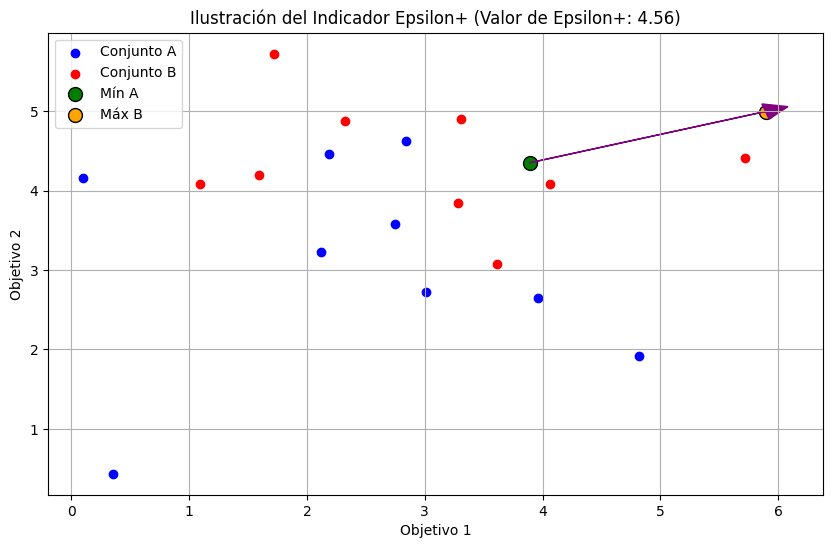

(4.560146322575914,
 array([3.89078375, 4.35006074]),
 array([5.89309171, 4.99579282]),
 0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar dos conjuntos de soluciones en R2
np.random.seed(0)  # para reproducibilidad
set_A = np.random.uniform(0, 5, (10, 2))  # 10 puntos aleatorios en 2D
set_B = np.random.uniform(1, 6, (10, 2))  # otros 10 puntos aleatorios en 2D

# Función para calcular epsilon+
def epsilon_plus(A, B):
    epsilon_values = []
    for b in B:
        min_improvements = [max(b[i] - a[i] for a in A) for i in range(2)]
        epsilon_values.append(min(min_improvements))

    max_epsilon = max(epsilon_values)
    return max_epsilon, epsilon_values

# Calcular epsilon+
epsilon_value, individual_epsilon_values = epsilon_plus(set_A, set_B)

# Identificar los puntos que contribuyen al valor de epsilon+
max_epsilon_index = np.argmax(individual_epsilon_values)
b_max = set_B[max_epsilon_index]
a_min = set_A[np.argmin([max(b_max[i] - a[i] for i in range(2)) for a in set_A])]

# Objetivo que maximiza la diferencia
objective_max_diff = np.argmax([b_max[i] - a_min[i] for i in range(2)])

# Trazado
plt.figure(figsize=(10, 6))
plt.scatter(set_A[:, 0], set_A[:, 1], color='blue', label='Conjunto A')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='Conjunto B')
plt.scatter(a_min[0], a_min[1], color='green', label='Mín A', s=100, edgecolors='k')
plt.scatter(b_max[0], b_max[1], color='orange', label='Máx B', s=100, edgecolors='k')
plt.arrow(a_min[0], a_min[1], b_max[0] - a_min[0], b_max[1] - a_min[1], 
          head_width=0.2, head_length=0.2, fc='purple', ec='purple')
plt.xlabel('Objetivo 1')
plt.ylabel('Objetivo 2')
plt.title(f'Ilustración del Indicador Epsilon+ (Valor de Epsilon+: {epsilon_value:.2f})')
plt.legend()
plt.grid(True)
plt.show()

# Devolver el valor de epsilon+, los puntos y el objetivo maximizado
epsilon_value, a_min, b_max, objective_max_diff


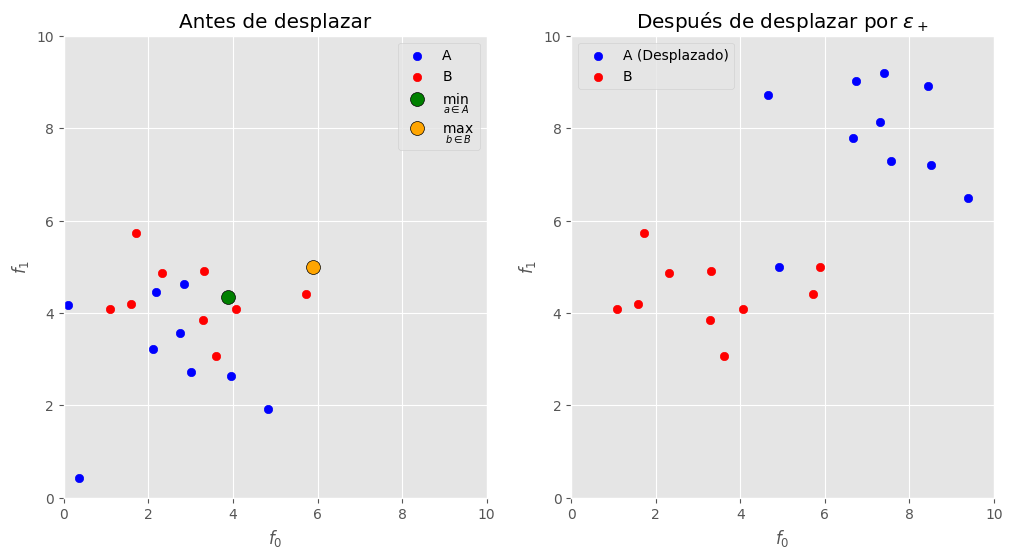

In [153]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(set_A[:, 0], set_A[:, 1], color='blue', label='A')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='B')
plt.scatter(a_min[0], a_min[1], color='green', label='$\min_{a\in A}$', s=100, edgecolors='k')
plt.scatter(b_max[0], b_max[1], color='orange', label='$\max_{b\in B}$', s=100, edgecolors='k')
plt.xlabel('$f_0$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.ylabel('$f_1$')
plt.title('Antes de desplazar')
plt.legend()
plt.grid(True)

# después de desplazar
set_A_displaced = set_A + epsilon_value
plt.subplot(1, 2, 2)
plt.scatter(set_A_displaced[:, 0], set_A_displaced[:, 1], color='blue', label='A (Desplazado)')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='B')
plt.xlabel('$f_0$')
plt.ylabel('$f_1$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Después de desplazar por $\\epsilon_+$')
plt.legend()
plt.grid(True)

# plt.tight_layout()
plt.savefig('../Tesis_Latex_LCD/Capitulo3/img/epsp.pdf')
plt.show()


## Non dominated sorting

In [164]:
import seaborn as sns

def dominates(row, candidateRow):
    return all(r <= c for r, c in zip(row, candidateRow)) and any(r < c for r, c in zip(row, candidateRow))

def non_dominated_sort(points):
    fronts = []
    dominated = {}
    dominate_counts = np.zeros(len(points))

    for i, p1 in enumerate(points):
        dominated[i] = set()
        for j, p2 in enumerate(points):
            if dominates(p1, p2):
                dominated[i].add(j)
            elif dominates(p2, p1):
                dominate_counts[i] += 1

        if dominate_counts[i] == 0:
            if not fronts:
                fronts.append(set())
            fronts[0].add(i)

    i = 0
    while fronts[i]:
        next_front = set()
        for j in fronts[i]:
            for k in dominated[j]:
                dominate_counts[k] -= 1
                if dominate_counts[k] == 0:
                    next_front.add(k)
        i += 1
        fronts.append(next_front)

    return fronts[:-1]



colors=sns.color_palette(n_colors=100)
print(colors)

In [167]:
# Example usage
n_fronts=np.inf
while n_fronts>5:
    points = np.random.rand(30, 2)  # Generate some random 2D points
    fronts = non_dominated_sort(points)
    n_fronts=len(fronts)


for i,front in enumerate(fronts):
    x_front=np.zeros(shape=(len(front),2))
    front_idx=np.array([f for f in front])

    x_front=points[front_idx,:]
    
    plt.scatter(x_front[:,0],x_front[:,1],color=colors[i],label=f'Capa {i+1}')
    # plt.plot(x_front[:,0],x_front[:,1],color=colors[i])

plt.title('Algoritmo de NSGA para puntos aleatorios y 5 capas')
plt.legend()
plt.xlabel('$f_0$')
plt.ylabel('$f_1$')
plt.savefig('../Tesis_Latex_LCD/Capitulo3/img/nds.pdf')
plt.show()

[(0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353), (0.596078431372549, 0.5568627450980392, 0.8352941176470589), (0.4666666666666667, 0.4666666666666667, 0.4666666666666667), (0.984313725490196, 0.7568627450980392, 0.3686274509803922), (0.5568627450980392, 0.7294117647058823, 0.25882352941176473), (1.0, 0.7098039215686275, 0.7215686274509804), (0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353), (0.596078431372549, 0.5568627450980392, 0.8352941176470589), (0.4666666666666667, 0.4666666666666667, 0.4666666666666667), (0.984313725490196, 0.7568627450980392, 0.3686274509803922), (0.5568627450980392, 0.7294117647058823, 0.25882352941176473), (1.0, 0.7098039215686275, 0.7215686274509804), (0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353), (0.596078431372549, 0.5568627450980392, 0.8352941176470589), (0.4666666666666667,

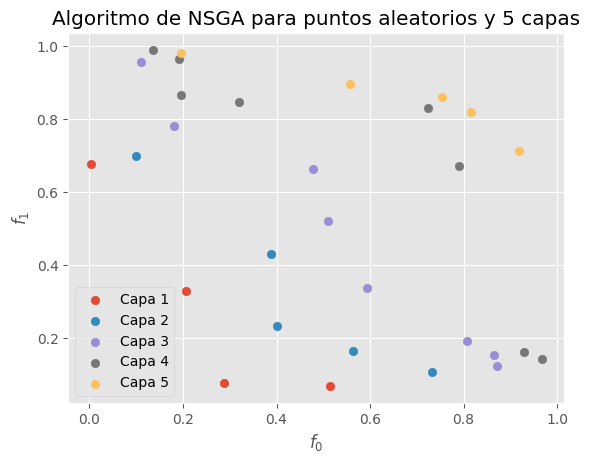

# Kruskal-Wallis

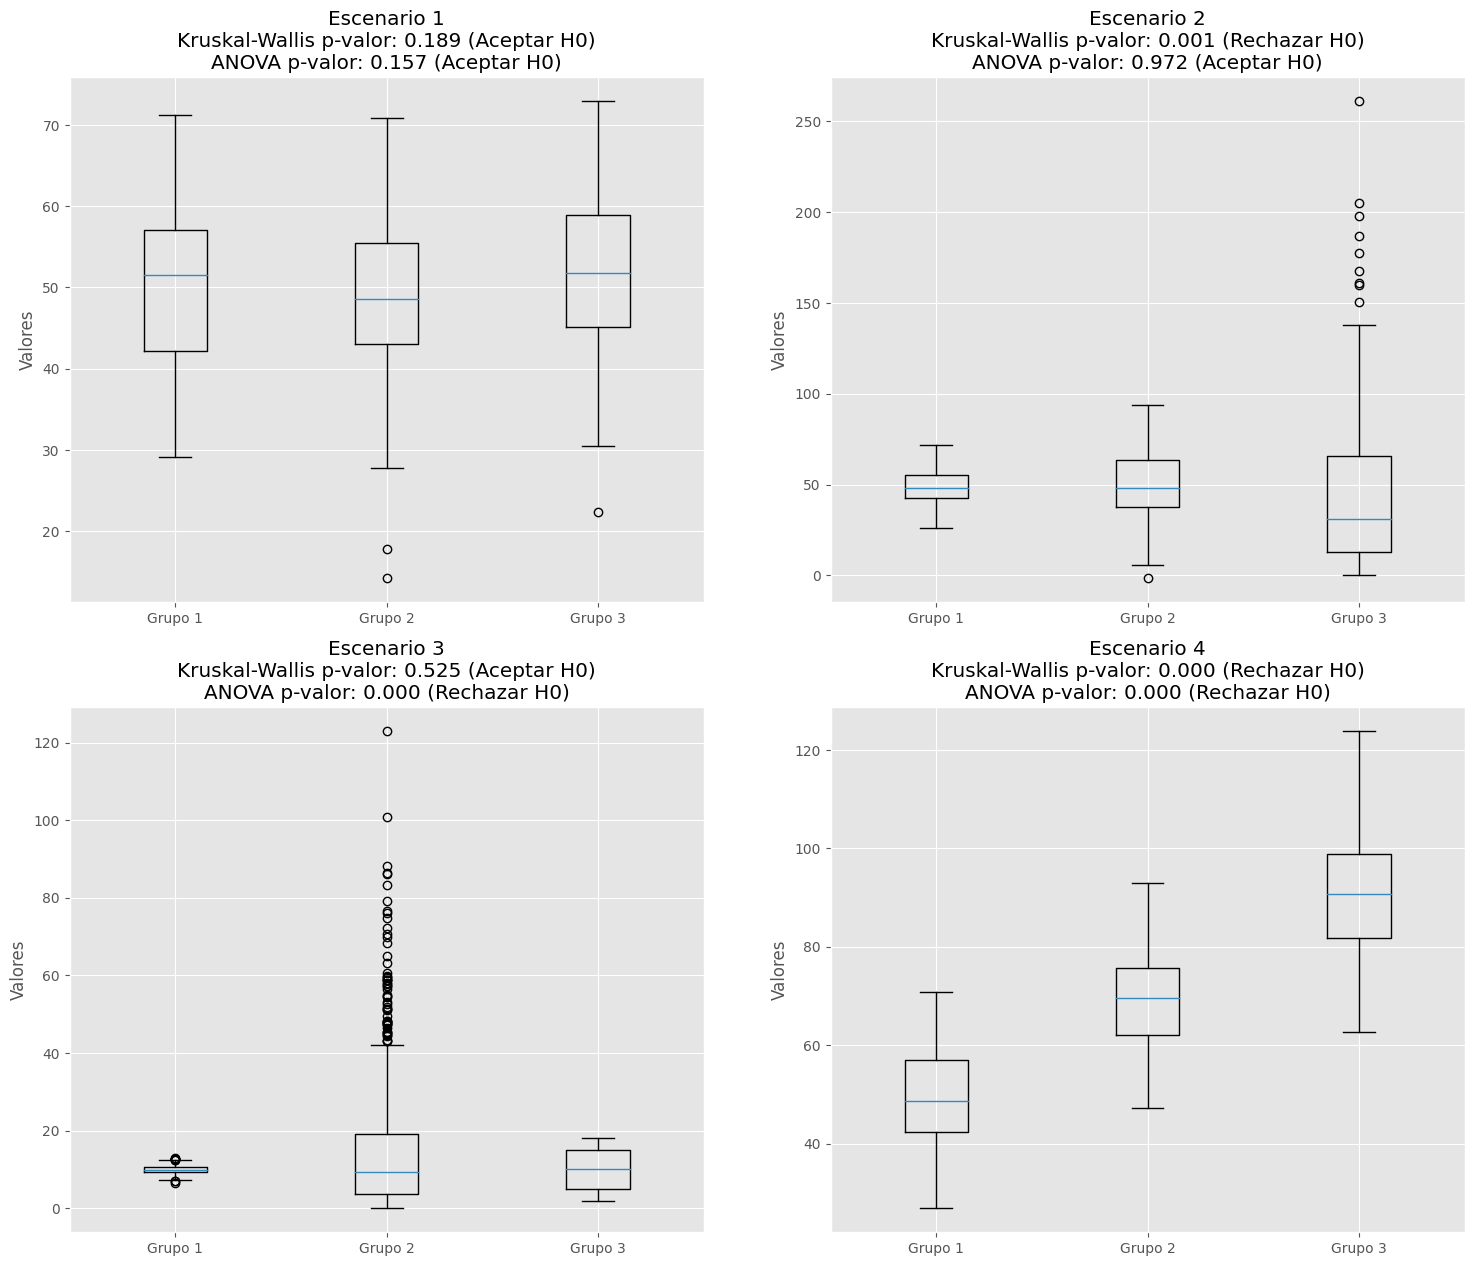

In [216]:
import scipy.stats as stats

alpha=0.05

# Escenario 1: H0 Aceptadas (distribuciones similar y medias)
pop1_s1 = np.random.normal(50, 10, 100)
pop2_s1 = np.random.normal(51, 10, 100)
pop3_s1 = np.random.normal(52, 10, 100)

# Escenario 2: H0 de ANOVA se acepta, H0 from Kruskal-Wallis Rejected (similar means, different distributions)
pop1_s2 = np.random.normal(50, 10, 100)
pop2_s2 = np.random.normal(50, 20, 100)
pop3_s2 = np.random.exponential(1, 100) * 50

# Escenario 3: H0 de kruskal se acepta, h0 de ANOVA se rechaza (medias y varianzas diferentes, pero distribuciones similares)

common_median = 10

pop1_s3 = np.random.normal(common_median, 1, 1000)

# 2. Distribución Exponencial (Desplazada para tener la misma mediana)
# Dado que la mediana de una distribución exponencial es log(2)*escala, resolvemos para escala
exponential_scale = common_median / np.log(2)
pop2_s3 = np.random.exponential(exponential_scale, 1000)

# 3. Distribución Bimodal (Dos medias diferentes, pero ajustadas para tener la misma mediana)

pop3_s3 = np.concatenate([np.random.normal(common_median - 5, 1, 500), 
                               np.random.normal(common_median + 5, 1, 500)])


# Escenario 4: Ambos H0 Rechazados (diferencias claras en medias/distribuciones)
pop1_s4 = np.random.normal(50, 10, 100)
pop2_s4 = np.random.normal(70, 10, 100)
pop3_s4 = np.random.normal(90, 10, 100)

# Pruebas
results = {}
for i, (pop1, pop2, pop3) in enumerate([(pop1_s1, pop2_s1, pop3_s1), (pop1_s2, pop2_s2, pop3_s2), 
                                        (pop1_s3, pop2_s3, pop3_s3), (pop1_s4, pop2_s4, pop3_s4)], 1):
    kw_stat, kw_pval = stats.kruskal(pop1, pop2, pop3)
    anova_stat, anova_pval = stats.f_oneway(pop1, pop2, pop3)
    results[i] = (kw_stat, kw_pval, anova_stat, anova_pval)

# Graficando
plt.figure(figsize=(18, 15))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.boxplot([globals()[f'pop{j}_s{i}'] for j in range(1, 4)], labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
    kw_pval = results[i][1]
    anova_pval = results[i][3]
    plt.title(f'Escenario {i}\nKruskal-Wallis p-valor: {kw_pval:.3f} ({"Rechazar" if kw_pval < alpha else "Aceptar"} H0)\n'
              f'ANOVA p-valor: {anova_pval:.3f} ({"Rechazar" if anova_pval < alpha else "Aceptar"} H0)')
    plt.ylabel('Valores')

# plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/kruskal.pdf')
plt.show()


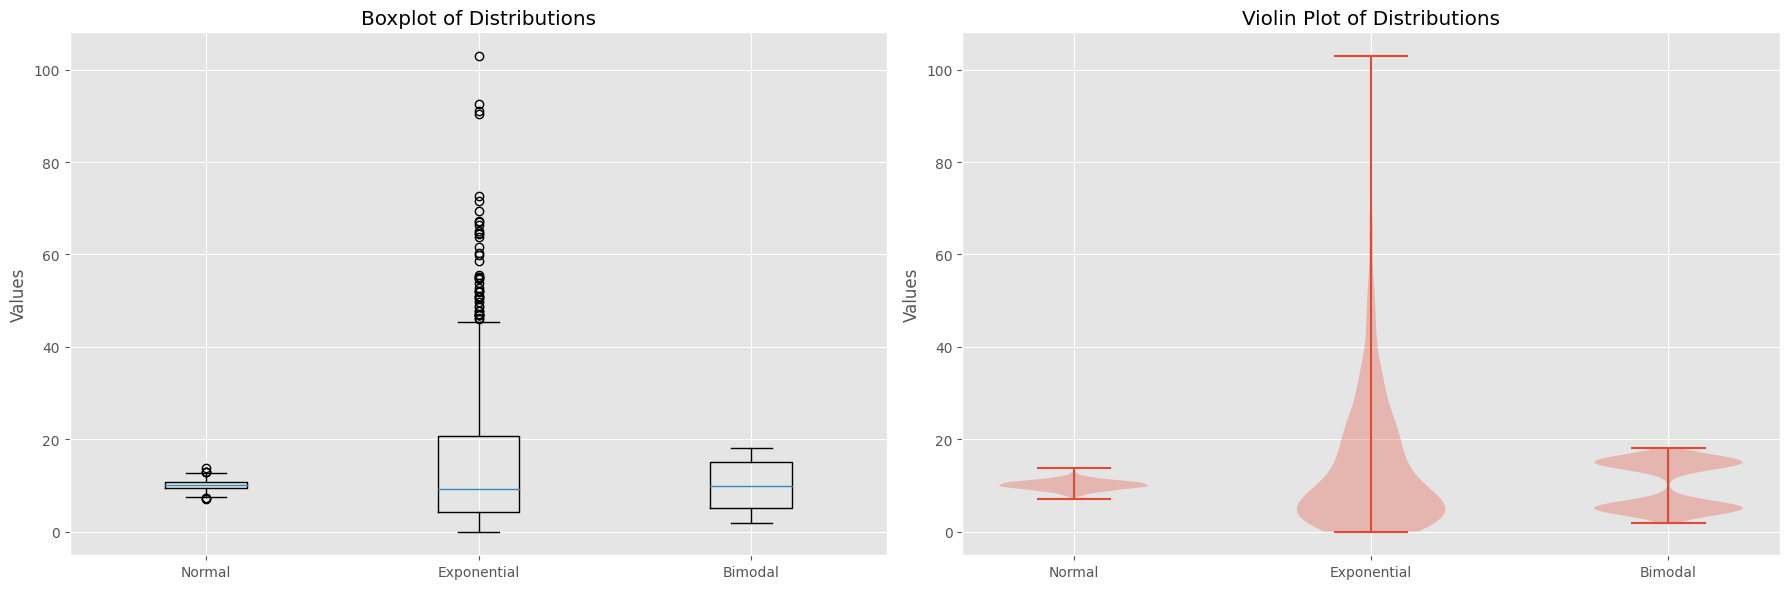

10.026862877243223 14.377231029608888 10.043172305544031
10.033318026307958 9.264340988645753 9.946000171713084


In [207]:
# Generating three distributions with the same median but different means

# Set the common median value

# 1. Normal Distribution (Centered at the median but with a small variance)
normal_dist = np.random.normal(common_median, 1, 1000)

# 2. Exponential Distribution (Shifted to have the same median)
# Since the median of an exponential distribution is log(2)*scale, we solve for scale
exponential_scale = common_median / np.log(2)
exponential_dist = np.random.exponential(exponential_scale, 1000)

# 3. Bimodal Distribution (Two different means, but adjusted to have the same median)
bimodal_dist = np.concatenate([np.random.normal(common_median - 5, 1, 500), 
                               np.random.normal(common_median + 5, 1, 500)])

# Creating boxplots and violin plots
plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot([normal_dist, exponential_dist, bimodal_dist], labels=['Normal', 'Exponential', 'Bimodal'])
plt.title('Boxplot of Distributions')
plt.ylabel('Values')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot([normal_dist, exponential_dist, bimodal_dist])
plt.xticks([1, 2, 3], ['Normal', 'Exponential', 'Bimodal'])
plt.title('Violin Plot of Distributions')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

# Calculate and return the means for confirmation
print(np.mean(normal_dist), np.mean(exponential_dist), np.mean(bimodal_dist))
print(np.median(normal_dist), np.median(exponential_dist), np.median(bimodal_dist))



In [212]:
# Running ANOVA and Kruskal-Wallis tests on the generated distributions

# ANOVA Test
anova_stat, anova_pval = stats.f_oneway(normal_dist, exponential_dist, bimodal_dist)

# Kruskal-Wallis Test
kruskal_stat, kruskal_pval = stats.kruskal(normal_dist, exponential_dist, bimodal_dist)

anova_pval, kruskal_pval


(7.366663059633404e-35, 0.39225713898828346)

# Wilcoxon

-0.014959759564491106 -0.009528792919316518
-0.014959759564491106 0.1643688611227018


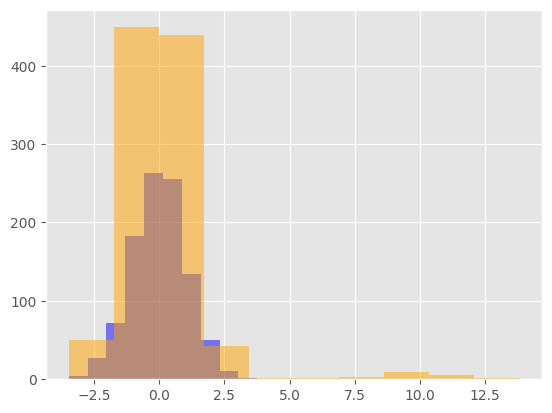

In [24]:
# Media de p_2 es mayor a la media de p_1
# Pero las medianas son parecidas
# Se quitan elementos más allá de la mediana original y se ponen como outliers

pop1_s2 = np.random.normal(0,1,size=1000)
# pop2_s2 = 

# Tomamos unos elementos más allá de la mediana y los hacemos outliers
mask_g_t_median = pop1_s2 >= np.median(pop1_s2)
idxs_g_t_median = np.where(mask_g_t_median)[0]

# Tomamos una fracción del 2% y lo convertimos en outlier

# tomamos los indices
idxs_to_outliers = np.random.choice(a=idxs_g_t_median,size=int(len(pop1_s2)*0.02))

# Lo convertimos en outliers p
print(np.median(pop1_s2),pop1_s2.mean())

pop2_s2=pop1_s2.copy()
pop2_s2[idxs_to_outliers] = np.random.normal(10,2,size=len(idxs_to_outliers))
print(np.median(pop2_s2),pop2_s2.mean())

plt.hist(pop1_s2,color='blue',alpha=0.5,label='pop1')
plt.hist(pop2_s2,color='orange',alpha=0.5, label='pop2')
plt.show()

In [29]:
stats.wilcoxon(y=pop1_s2,x=pop2_s2), stats.ttest_ind(b=pop1_s2,a=pop2_s2,alternative='greater')

(WilcoxonResult(statistic=0.0, pvalue=0.0001318338889828333),
 Ttest_indResult(statistic=2.7414323838040806, pvalue=0.0030858476722301327))

Se tendrían que parear las muestras haciendo la diferencia de una a una? Es decir, se tienen que parear a priori o dejar que statmodels las paree como be fit.

PReguntarle a carlos que visualización sería buena para ver casos donde wilcoxon arroja resultados distintos a ttest.

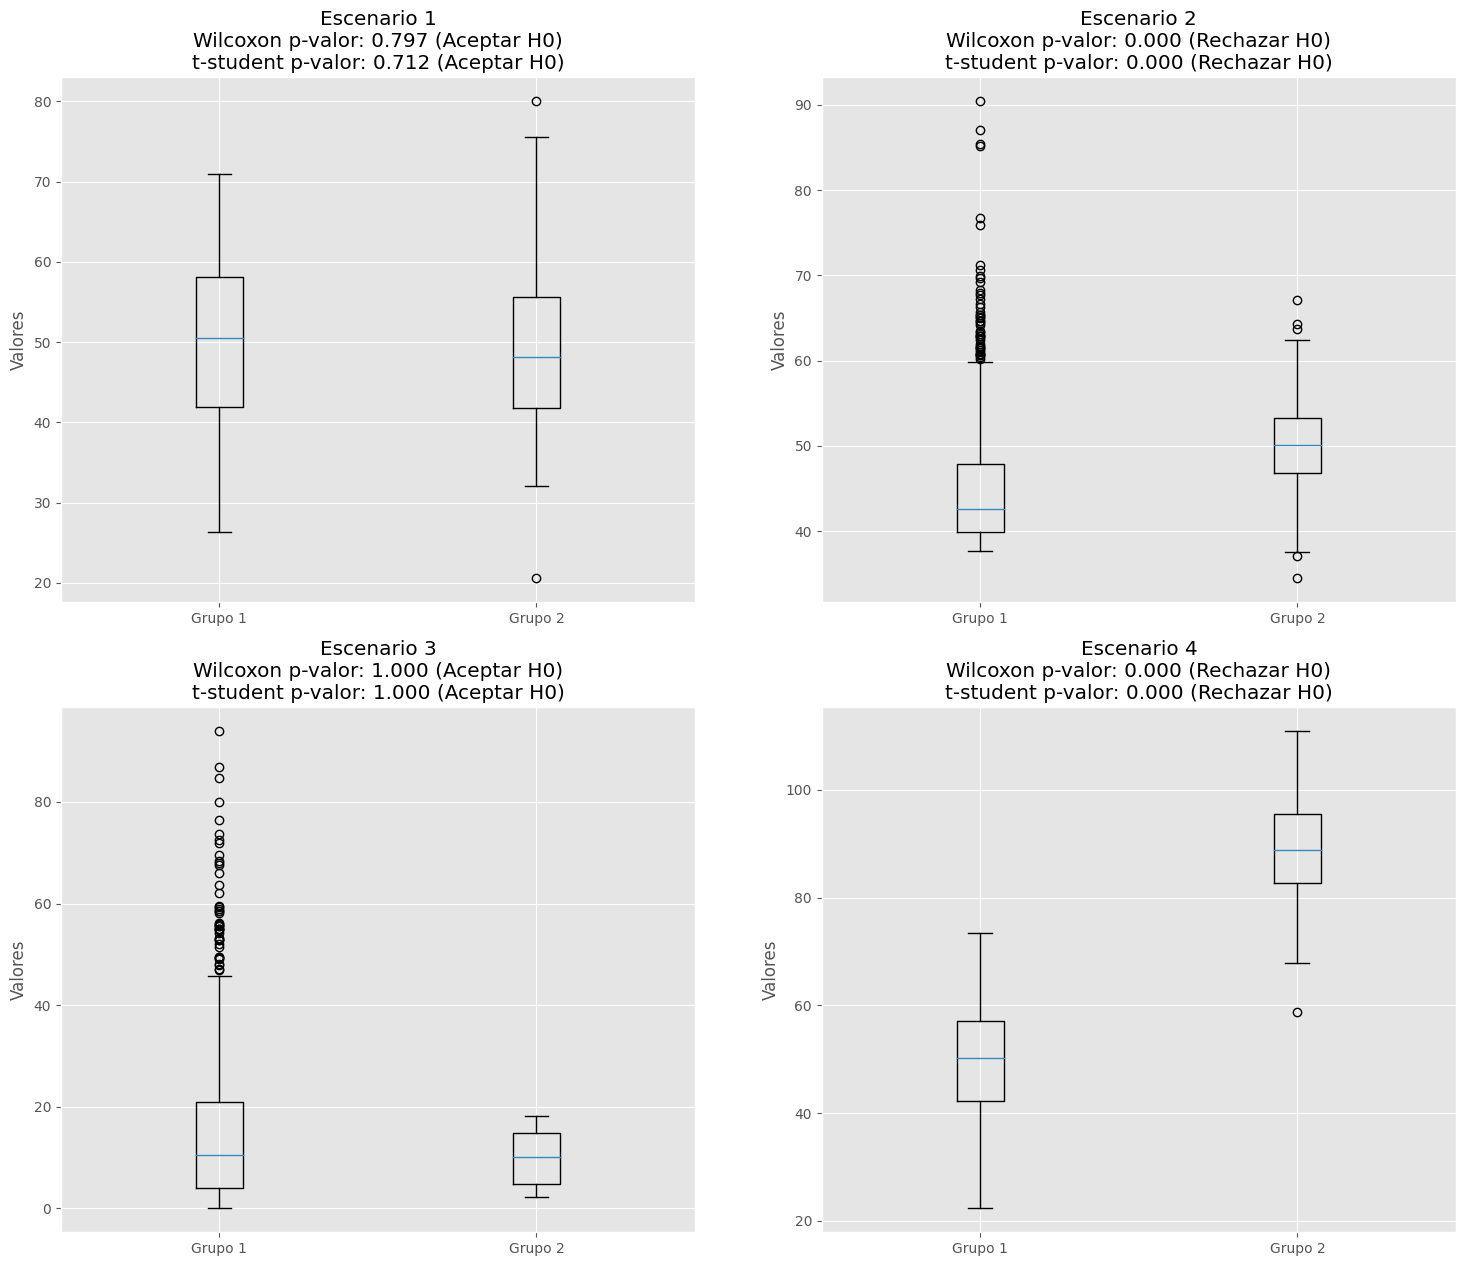

In [241]:


alpha=0.05
# Adjusted data generation for specific scenarios

# Scenario 1: Both H0 Accepted (similar distributions and means)
pop1_s1 = np.random.normal(50, 10, 100)
pop2_s1 = np.random.normal(50, 10, 100)

# Scenario 2: H0 from t-student Accepted, H0 from Kruskal-Wallis Rejected (similar means, different distributions)
# pop1_s2 = np.random.normal(50, 10, 100)
# pop2_s2 = np.random.exponential(1, 100) * 50
mean_value = 50
pop1 = np.random.normal(mean_value, 5, 1000)
pop1_mean=pop1.mean()
# Generating a distribution with a mean similar to Population 1 but with the median 5 units different

# Target mean and median difference
target_mean = pop1_mean
target_median_diff = 5

# A skewed distribution, such as an exponential distribution, can be used to achieve this
# Adjusting the scale of the exponential distribution to match the desired mean and median difference
# Since the median of an exponential distribution is log(2)*scale, we can set scale accordingly
scale = target_median_diff / np.log(2)



# Scenario 3: H0 from Kruskal Accepted, H0 from t-student Rejected (different means/variances, similar distribution shapes)
common_median = 10

# 2. Exponential Distribution (Shifted to have the same median)
# Since the median of an exponential distribution is log(2)*scale, we solve for scale
exponential_scale = common_median / np.log(2)
pop1_s3 = np.random.exponential(exponential_scale, 1000)

# 3. Bimodal Distribution (Two different means, but adjusted to have the same median)
pop2_s3 = np.concatenate([np.random.normal(common_median - 5, 1, 500), 
                               np.random.normal(common_median + 5, 1, 500)])




# Scenario 4: Both H0 Rejected (clear differences in means/distributions)
pop1_s4 = np.random.normal(50, 10, 100)
pop2_s4 = np.random.normal(90, 10, 100)


# Perform tests for each scenario
results = {}
for i, (pop1, pop2) in enumerate([(pop1_s1, pop2_s1), (pop1_s2, pop2_s2), 
                                        (pop1_s3, pop2_s3), (pop1_s4, pop2_s4)], 1):
    wilcoxon_stat, wilcoxon_pval = stats.wilcoxon(pop2,pop1,alternative='greater')
    ttest_stat, ttest_pval = stats.ttest_ind(a=pop2,b=pop1,alternative='greater')
    results[i] = (wilcoxon_stat, wilcoxon_pval, ttest_stat, ttest_pval)


# Plotting the scenarios
plt.figure(figsize=(18, 15))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.boxplot([globals()[f'pop{j}_s{i}'] for j in range(1, 3)], labels=['Grupo 1', 'Grupo 2'])
    wilcoxon_pval = results[i][1]
    ttest_pval = results[i][3]
    plt.title(f'Escenario {i}\nWilcoxon p-valor: {wilcoxon_pval:.3f} ({"Rechazar" if wilcoxon_pval < alpha else "Aceptar"} H0)\n'
              f't-student p-valor: {ttest_pval:.3f} ({"Rechazar" if ttest_pval < alpha else "Aceptar"} H0)')
    plt.ylabel('Valores')

plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/Wilcoxon.pdf')
plt.show()


In [244]:
pop1_s2.mean(), pop2_s2.mean(), np.median(pop2_s1), np.median(pop2_s2)

(44.93638291364302, 49.93353727092696, 48.0872821465233, 50.05164696067156)

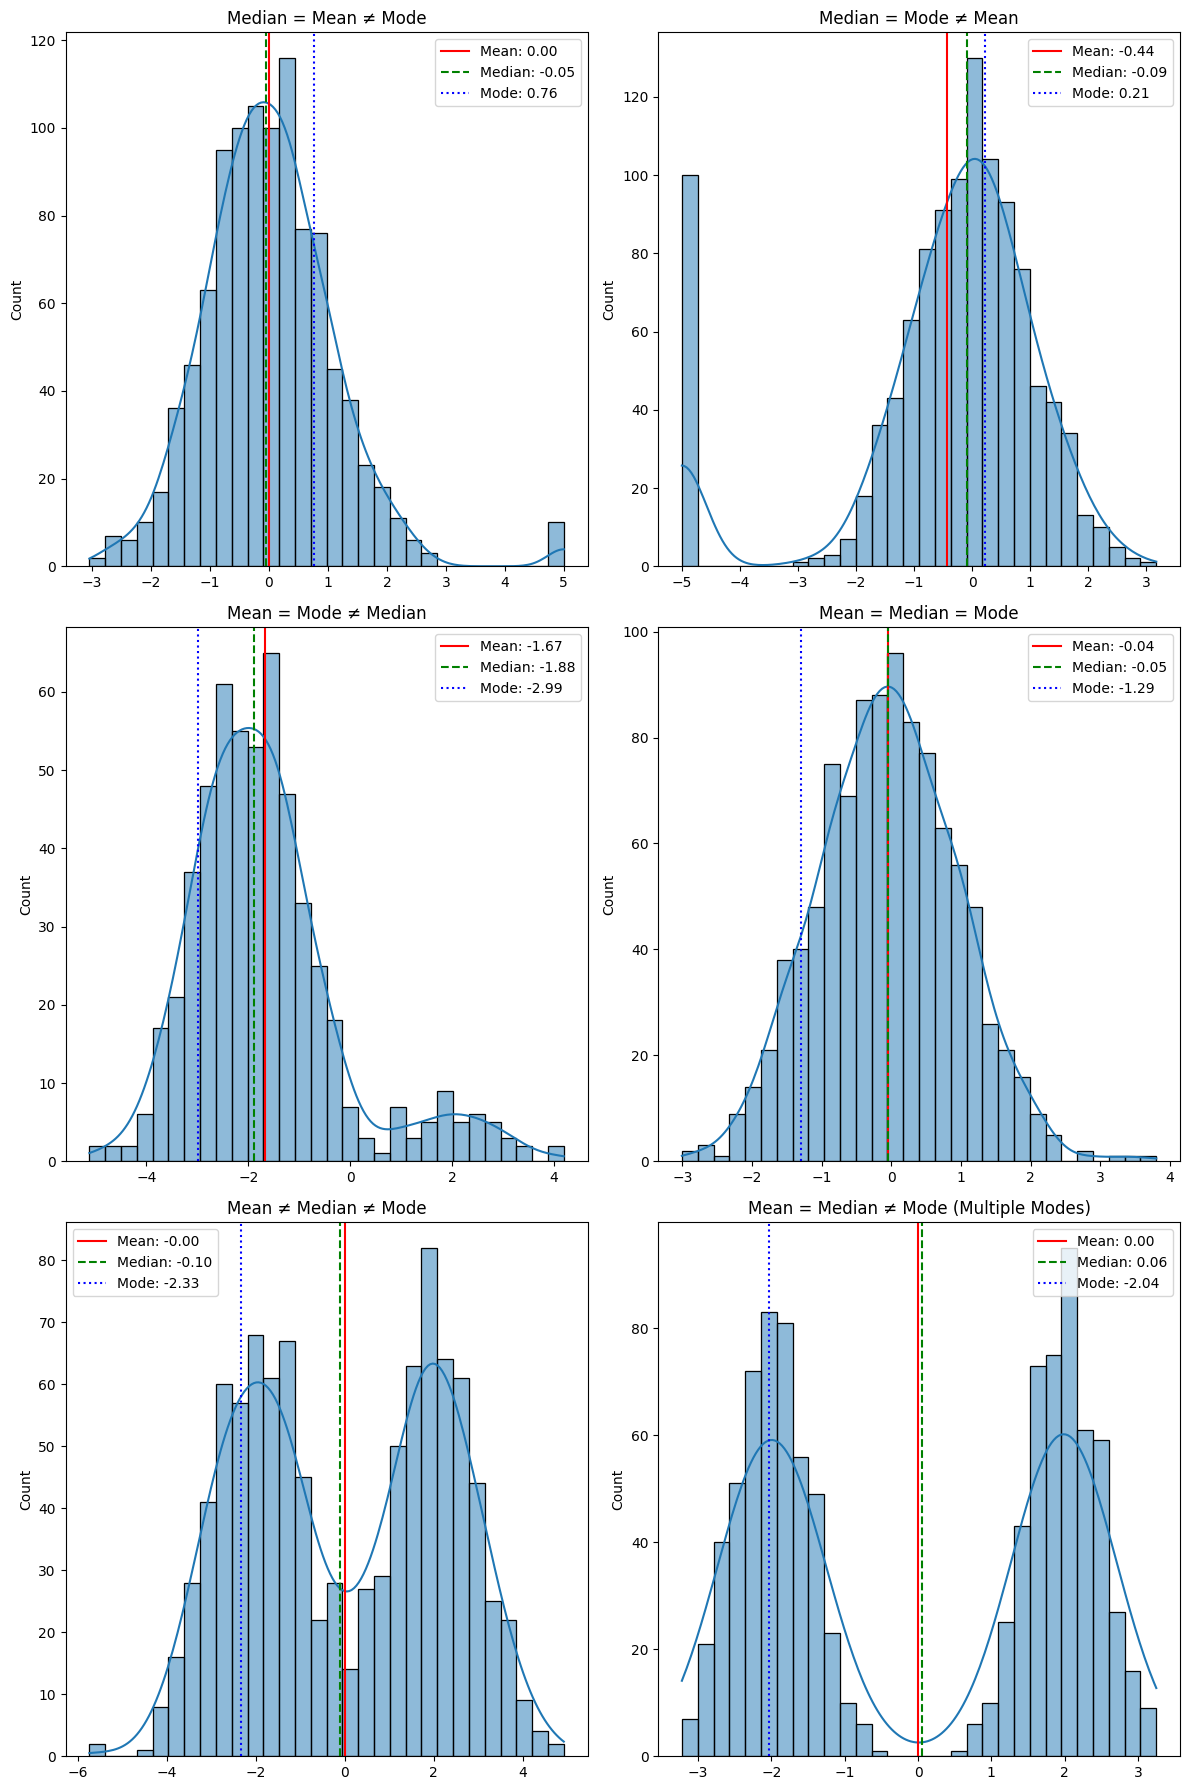

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Titles for each subplot
titles = [
    "Median = Mean ≠ Mode",
    "Median = Mode ≠ Mean",
    "Mean = Mode ≠ Median",
    "Mean = Median = Mode",
    "Mean ≠ Median ≠ Mode",
    "Mean = Median ≠ Mode (Multiple Modes)"
]

# Generating example data for each case
np.random.seed(0)

# Median = Mean ≠ Mode
data1 = np.random.normal(0, 1, 1000)
data1 = np.append(data1, [5]*10)  # slight skew

# Median = Mode ≠ Mean
data2 = np.random.normal(0, 1, 1000)
data2 = np.append(data2, [-5]*100)  # moderate skew

# Mean = Mode ≠ Median
data3 = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 50)])  # bimodal with asymmetry

# Mean = Median = Mode
data4 = np.random.normal(0, 1, 1000)  # symmetrical

# Mean ≠ Median ≠ Mode
data5 = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 500)])  # highly skewed/bimodal

# Mean = Median ≠ Mode (Multiple Modes)
data6 = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])  # symmetric bimodal

# Data list
data_list = [data1, data2, data3, data4, data5, data6]

# Plot each distribution
for ax, data, title in zip(axes.flatten(), data_list, titles):
    sns.histplot(data, ax=ax, kde=True, bins=30)
    mean = np.mean(data)
    median = np.median(data)
    mode = float(data[np.argmax(np.histogram(data, bins=30)[0])])

    ax.axvline(mean, color='r', linestyle='-', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode:.2f}')
    ax.legend()
    ax.set_title(title)

plt.tight_layout()
plt.show()


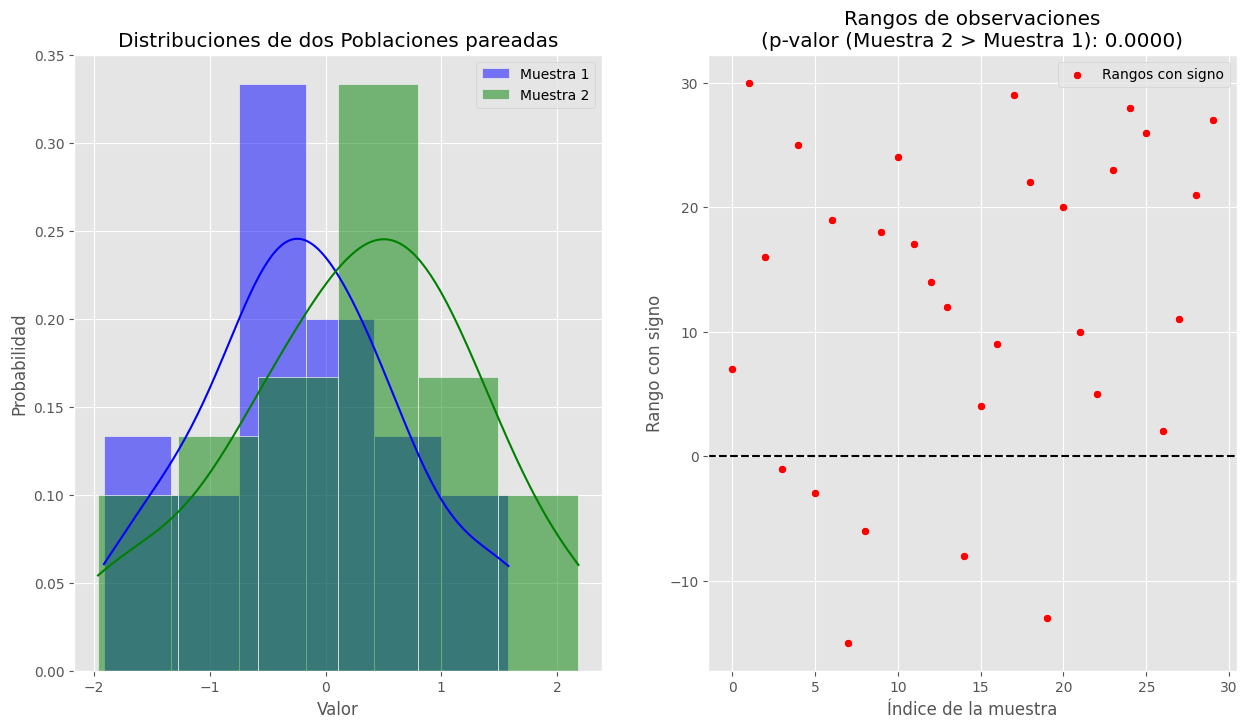

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

# Generate example data for demonstration
np.random.seed(42)
data1 = np.random.normal(0, 1, 30)  # Sample 1
data2 = data1 + np.random.normal(0.5, 0.5, 30)  # Sample 2 with a slight overall increase

# Perform Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(data2, data1, alternative='greater')

# Calculate differences and ranks
differences = data2 - data1
abs_differences = np.abs(differences)
ranks = np.argsort(np.argsort(abs_differences)) + 1  # Rank the absolute differences
signed_ranks = ranks * np.sign(differences)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Distribution plot
sns.histplot(data1, color="blue", kde=True, ax=axes[0], label='Muestra 1',stat='probability')
sns.histplot(data2, color="green", kde=True, ax=axes[0], label='Muestra 2',stat='probability')
axes[0].set_title("Distribuciones de dos Poblaciones pareadas")
axes[0].set_xlabel("Valor")
axes[0].set_ylabel("Probabilidad")
axes[0].legend()

# Wilcoxon Signed-Rank Test plot
sns.scatterplot(x=np.arange(len(data1)), y=signed_ranks, color="red", ax=axes[1], label="Rangos con signo")
axes[1].axhline(0, color='k', linestyle='--')  # Line at zero for reference
axes[1].set_title(f"Rangos de observaciones\n(p-valor (Muestra 2 > Muestra 1): {p_value:.4f})")
axes[1].set_xlabel("Índice de la muestra")
axes[1].set_ylabel("Rango con signo")
axes[1].legend()
axes[1].grid(True)

plt.savefig('../Tesis_Latex_LCD/Capitulo3/img/Wilcoxon_vis.pdf')
plt.show()

